0.9999999999999999


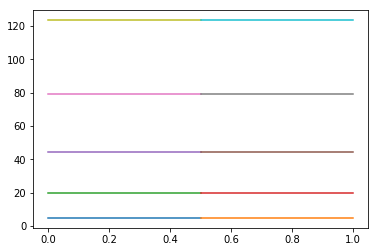

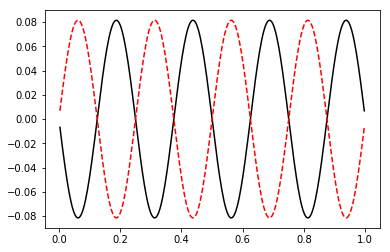

-0.0576390417704177 0.0576390417704235 301.0
row 0 (dot) row 0: 1.00
col 0 (dot) col 0: 1.00
row 0 (dot) row 1: 0.00
col 0 (dot) col 1: 0.00
row 0 (dot) row 2: 0.00
col 0 (dot) col 2: 0.00
row 0 (dot) row 3: -0.00
col 0 (dot) col 3: 0.00
row 0 (dot) row 4: -0.00
col 0 (dot) col 4: 0.00
row 1 (dot) row 0: 0.00
col 1 (dot) col 0: 0.00
row 1 (dot) row 1: 1.00
col 1 (dot) col 1: 1.00
row 1 (dot) row 2: -0.00
col 1 (dot) col 2: -0.00
row 1 (dot) row 3: 0.00
col 1 (dot) col 3: 0.00
row 1 (dot) row 4: -0.00
col 1 (dot) col 4: -0.00
row 2 (dot) row 0: 0.00
col 2 (dot) col 0: 0.00
row 2 (dot) row 1: -0.00
col 2 (dot) col 1: -0.00
row 2 (dot) row 2: 1.00
col 2 (dot) col 2: 1.00
row 2 (dot) row 3: 0.00
col 2 (dot) col 3: 0.00
row 2 (dot) row 4: -0.00
col 2 (dot) col 4: 0.00
row 3 (dot) row 0: -0.00
col 3 (dot) col 0: 0.00
row 3 (dot) row 1: 0.00
col 3 (dot) col 1: 0.00
row 3 (dot) row 2: 0.00
col 3 (dot) col 2: 0.00
row 3 (dot) row 3: 1.00
col 3 (dot) col 3: 1.00
row 3 (dot) row 4: 0.00
col 3 (do

In [30]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

hbar = 1
m = 1
L = 1
N = 300
dx = L / (N + 1)
x = np.linspace(dx, N * dx, N)

# Some does not have scipy.linalg.eigh_tridiagonal, so this takes care of that
try:
    from scipy.linalg import eigh_tridiagonal
    get_eigh = lambda H: eigh_tridiagonal(np.diag(H), np.diag(H, k=1))
except ImportError:
    get_eigh = np.linalg.eigh


def V(x):
    return 0

# Initialize the tridiagonal NxN matrix H
H = np.zeros((N, N))
for i in range(0, N):
    H[i][i] = hbar**2 / (m * dx**2) + V(x[i])
for i in range(0, N - 1):
    H[i][i+1] = -hbar**2 / (2 * m * dx**2)
    H[i+1][i] = -hbar**2 / (2 * m * dx**2)

eigvals, eigvecs = get_eigh(H)
print(np.linalg.norm(eigvecs[:,10]))

# Plot the first 5 energy levels
for j in range(0, 5):
    eigval = eigvals[j]
    plt.plot((0, L/2), (eigval, eigval))
    eigval = hbar**2 * ((j+1) * np.pi / L)**2 / 2 / m # Theoretical values for V(x) = 0.
    plt.plot((L/2, L), (eigval, eigval))
plt.show()

j = 8
y1 = eigvecs[:,j-1]
y2 = np.sqrt(2/L) * np.sin(j*np.pi/L*x)
plt.plot(x, y1, "k-")
plt.plot(x, y2 * dx**(1/2), "r--")
plt.show()

print(y1[0] / y2[0], dx**(1/2), 1/dx)

for i in range(0, 5):
    for j in range(0, 5):
        print("row %d (dot) row %d: %.2f" % (i, j, np.dot(eigvecs[i,:], eigvecs[j,:])))
        print("col %d (dot) col %d: %.2f" % (i, j, np.dot(eigvecs[:,i], eigvecs[:,j])))
